# Exploring the location of consensus errors in relation to homopolymers
---

In [1]:
import os
import sys
import configparser
import getopt
import numpy as np
import pandas as pd
from collections import Counter

from lib.error import *

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style('white')
sns.set_style('ticks')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.figsize'] = [4, 4]

## Preference

In [3]:
expt_dir = "../analysis/ont/zambia/2019-04-10"
cntrl_sample = "BC05"

# I. Merge consensus errors with homopolymers

In [140]:
def consensus_error_and_homopolymers(df):
    """
    Create a Data Frame comparing the consensus
    errors and the location of homopolymers
    
    """
    
    # Get reference sequence
    seq = "".join(df["ref"])
    
    # Convert to frequencies
    df = convert_to_frequencies(df, "total", ["position", "ref", "total"])
    calls = ["A", "T", "C", "G", "-", "+"]
    df["call"] = df[calls].idxmax(1)
    
    # Get consensus errors
    df = df.query("call != ref")
 
    # Get homopolymers
    homopolymers = annotate_homopolymers(seq)
    
    # Merge
    results = pd.merge(left=df,
                       right=homopolymers.drop("ref", 1),
                       on="position")

    return results

## I. Kelch13

In [141]:
cntrl_fn = cntrl_sample + ".KELCH13.reverse.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)
df = pd.read_csv(cntrl_path)

In [142]:
kelch = consensus_error_and_homopolymers(df) 

In [143]:
kelch

,position,ref,total,A,T,C,G,-,+,SNV,error,call,homo,homo_id,homo_len
0,275,A,9209,0.353024,0.001955,0.001303,0.008687,0.632968,0.002063,0.011945,0.646976,-,True,276.6,6.0
1,283,T,9238,0.005521,0.478026,0.009851,0.021758,0.479758,0.005088,0.037129,0.521974,-,True,284.6,6.0
2,371,A,9201,0.408760,0.007499,0.000543,0.005760,0.574829,0.002608,0.013803,0.591240,-,True,372.9,9.0
3,503,A,9267,0.417179,0.004424,0.000647,0.017158,0.544297,0.016294,0.022229,0.582821,-,True,504.6,6.0
4,566,A,9126,0.400394,0.038571,0.008218,0.005698,0.541639,0.005479,0.052487,0.599606,-,True,567.7,7.0
5,694,A,9062,0.431472,0.006069,0.003200,0.019091,0.533878,0.006290,0.028360,0.568528,-,True,695.6,6.0
6,1019,A,8855,0.429136,0.004856,0.002484,0.004404,0.554602,0.004517,0.011745,0.570864,-,True,1021.1,10.0
7,1020,A,8857,0.240149,0.005758,0.000677,0.002371,0.746189,0.004855,0.008807,0.759851,-,True,1021.1,10.0
8,1115,A,8799,0.451870,0.001591,0.000341,0.023866,0.519377,0.002955,0.025798,0.548130,-,True,1116.5,5.0
9,1439,A,8587,0.434028,0.001747,0.002213,0.002795,0.556073,0.003144,0.006754,0.565972,-,True,1440.6,6.0


## II. DHFR

In [144]:
cntrl_fn = cntrl_sample + ".DHFR.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)
df = pd.read_csv(cntrl_path)

In [145]:
dhfr = consensus_error_and_homopolymers(df) 

In [146]:
dhfr

,position,ref,total,A,T,C,G,-,+,SNV,error,call,homo,homo_id,homo_len
0,77,G,12152,0.026662,0.000494,0.000329,0.470540,0.476712,0.025263,0.027485,0.529460,-,True,78.4,4.0
1,78,A,8162,0.262191,0.000980,0.000980,0.023156,0.709507,0.003185,0.025116,0.737809,-,True,86.8,8.0
2,79,A,8139,0.463079,0.002334,0.000860,0.021747,0.511488,0.000491,0.024942,0.536921,-,True,86.8,8.0
3,392,A,8328,0.391571,0.013208,0.031940,0.005283,0.551633,0.006364,0.050432,0.608429,-,True,399.7,7.0
4,536,A,8358,0.386456,0.005264,0.011725,0.006581,0.586624,0.003350,0.023570,0.613544,-,True,544.8,8.0
5,730,A,8473,0.416617,0.003777,0.002833,0.024076,0.547150,0.005547,0.030686,0.583383,-,True,737.7,7.0
6,783,A,8518,0.467950,0.005283,0.003287,0.018666,0.497652,0.007161,0.027236,0.532050,-,True,789.6,6.0


## III. CRT

In [153]:
cntrl_fn = cntrl_sample + ".CRT.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)
df = pd.read_csv(cntrl_path)
df = df.query("total > 1")  # don't have whole gene

In [154]:
crt = consensus_error_and_homopolymers(df) 

In [155]:
crt

,position,ref,total,A,T,C,G,-,+,SNV,error,call,homo,homo_id,homo_len
0,15,A,8188,0.334270,0.003908,0.016488,0.015144,0.623351,0.006839,0.035540,0.665730,-,True,23.8,8.0
1,28,A,8132,0.418101,0.008239,0.006886,0.005411,0.559764,0.001599,0.020536,0.581899,-,True,35.7,7.0
2,705,A,8629,0.465755,0.042299,0.005563,0.009619,0.475721,0.001043,0.057481,0.534245,-,True,711.6,6.0
3,848,A,8667,0.286143,0.002423,0.006231,0.013615,0.685704,0.005884,0.022268,0.713857,-,True,854.6,6.0


## IV. MSP2

In [159]:
cntrl_fn = cntrl_sample + ".MSP2.reverse.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)
df = pd.read_csv(cntrl_path)

In [160]:
msp = consensus_error_and_homopolymers(df)

In [161]:
msp

,position,ref,total,A,T,C,G,-,+,SNV,error,call,homo,homo_id,homo_len
0,581,C,7703,0.05764,0.119823,0.259509,0.019083,0.534078,0.009866,0.196547,0.740491,-,True,582.5,5.0


# II. Combine all genes

In [167]:
kelch["gene"] = "K13"
crt["gene"] = "CRT1"
dhfr["gene"] = "DHFR"
msp["gene"] = "MSP2"

In [168]:
genes = [kelch, crt, dhfr, msp]
gene_df = pd.concat(genes)

# III. Plot results

In [170]:
gene_df["call_wsaf"] = [row[row["call"]] for ix, row in gene_df.iterrows()]
gene_df["ref_wsaf"] = [row[row["ref"]] for ix, row in gene_df.iterrows()]

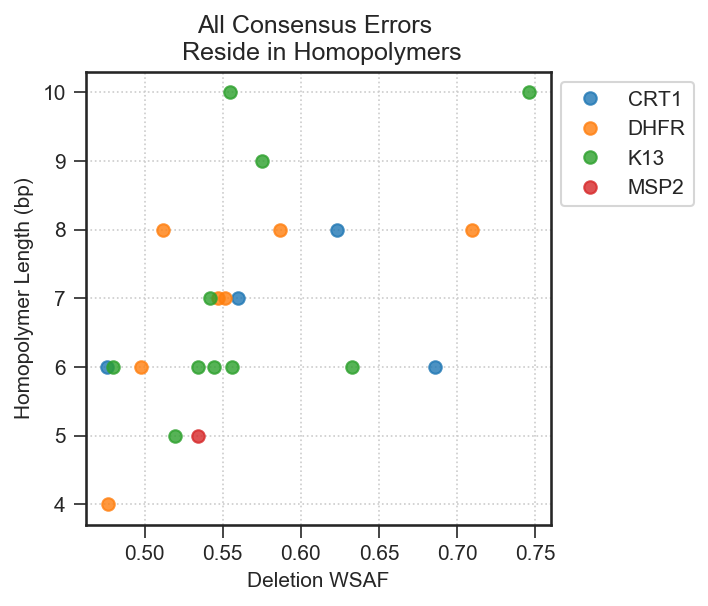

In [194]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

for gene, df in gene_df.groupby("gene"):
    ax.plot(df["call_wsaf"], df["homo_len"],
            alpha=0.8, marker='o', linestyle="",
            label=gene)

ax.set_ylabel("Homopolymer Length (bp)")
ax.set_xlabel("Deletion WSAF")
ax.set_title("All Consensus Errors \n Reside in Homopolymers")
ax.grid(linestyle='dotted')

ax.legend(bbox_to_anchor=(1, 1), frameon=True)

In [76]:
def abline(a, b, ax, 
           xmin=0, xmax=1,
           **opts):
    """
    Plot a straight line
    a + bx
    """
    
    xs = [xmin, xmax]
    ys = [a + b*x for x in xs]
    ax.plot(xs, ys, **opts)

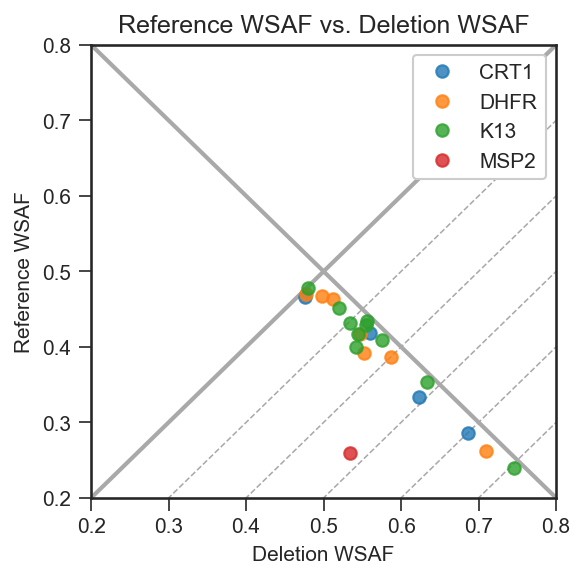

In [211]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

for gene, df in gene_df.groupby("gene"):
    ax.plot(df["call_wsaf"], df["ref_wsaf"],
            alpha=0.8, marker='o', linestyle="",
            label=gene)

ax.set_ylabel("Reference WSAF")
ax.set_xlabel("Deletion WSAF")
ax.set_title("Reference WSAF vs. Deletion WSAF")


ax.set_xlim((0.2, 0.8))
ax.set_ylim((0.2, 0.8))


abline(a=0, b=1, ax=ax, 
       linestyle="solid", linewidth=2,
       color='darkgrey', zorder=0)
abline(a=1, b=-1, ax=ax, 
       linestyle="solid", linewidth=2,
       color='darkgrey', zorder=0)

for a in np.arange(-0.5, 0, 0.1):
    abline(a=a, b=1, ax=ax, 
           linestyle="dashed", linewidth=0.75, 
           color='darkgrey', zorder=0)

ax.legend(loc="upper right", 
          frameon=True, framealpha=1.0)